In [ ]:
主に画像認識で使用する

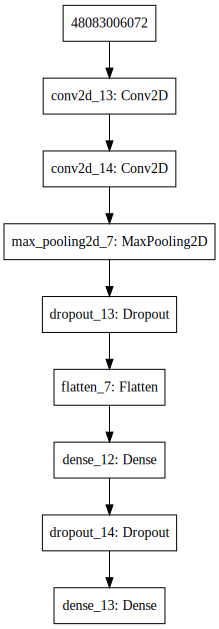

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import pydot_ng as pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

keras.utils.vis_utils.pydot = pydot

# 最終的な出力ユニット数 ≒ 分類数
num_classes = 10

# 32x32 のグレイスケール画像 TensorFlow
input_shape = (32, 32, 1)
# カラー画像
# input_shape = (32, 32, 3)

# cnn model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

plot_model(model, to_file='img/cnn.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))